In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [2]:
# search for csv location

found = []

def find(name, path):
    path = os.getcwd() + path
    file = name

    for root, dir, files in os.walk(path):
        for item in files:
            if file == item:
                return os.path.join(root, file)
        return None
data = ['00', '01', '02', '03', '05', '22', '23', '24', '25']
for d in data:
    found.append(find('data_' + d + '.csv.gz', '/irc-sphere-sleep-56db93f64661/sphere-sensor-data'))
    found.append(find('data_' + d + '.csv', '/irc-sphere-sleep-56db93f64661/sphere-sensor-data'))

In [3]:
# load file

df = []
for path in found:
    if path is not None:
        if 'gz' in path:
            fileName = path
            df.append(pd.read_csv(fileName, index_col='datetime', compression='gzip'))
        else: 
            fileName = path
            df.append(pd.read_csv(fileName, index_col='datetime'))

//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
environment_data = []
for d in df:
    environment_data.append(d[['cold-water', 'door', 'electricity',
                           'hid', 'hot-water', 'humidity',
                           'light', 'motion', 'noise', 'temperature']])


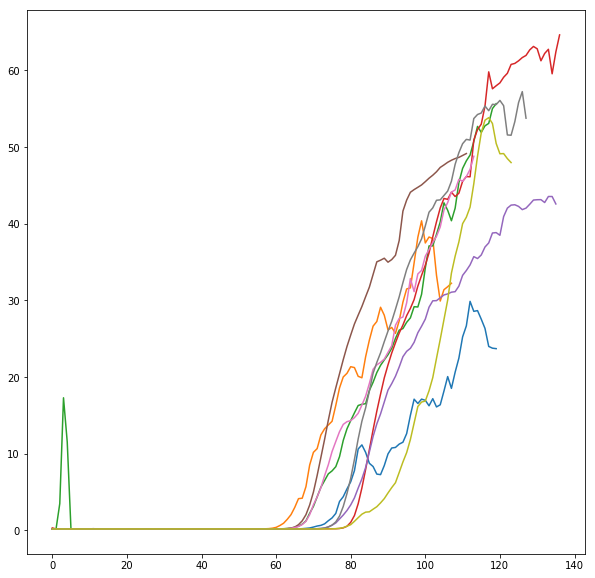

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for e in environment_data:
    # exclude missing data
    temp = e['temp'].dropna()

    resample_interval = '5Min'

    # convert index to DatetimeIndex
    temp.index = pd.DatetimeIndex(temp.index)

    temp_resample = temp.resample(resample_interval).mean()
    
    times = []
    for i,n in enumerate(temp_resample.index):
        times.append(i)
    
    plt.plot(times, temp_resample)
    #ax.set_xlim(xmin=22)
    #plt.gcf().autofmt_xdate()
plt.show()

In [6]:
enumerate(temp_resample.index)